In [ ]:
#random forest

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\LENOVO\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')
print(data.head())

   region   rank_mean  frequency  danceability  energy  key  loudness  mode  \
0       3   22.000000          4         0.685   0.644   10   -13.206     0   
1       3  100.461538        182         0.752   0.620    5    -5.536     1   
2       1   93.302548        314         0.748   0.627    7    -6.029     1   
3       2   77.031496        635         0.748   0.627    7    -6.029     1   
4       3  130.044329        767         0.748   0.627    7    -6.029     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1550         0.302          0.000055    0.1140    0.808  164.919   
1       0.0509         0.309          0.000000    0.0750    0.962  117.399   
2       0.0639         0.131          0.000000    0.0852    0.524  120.963   
3       0.0639         0.131          0.000000    0.0852    0.524  120.963   
4       0.0639         0.131          0.000000    0.0852    0.524  120.963   

   duration_ms  time_signature  popular  
0       169379

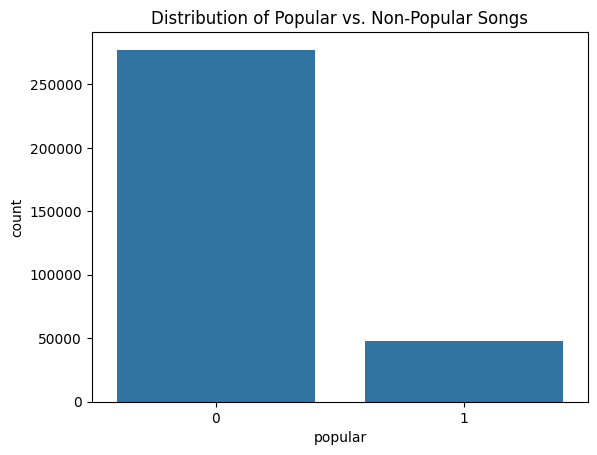

In [15]:
import seaborn as sns

sns.countplot(x='popular', data=df)
plt.title('Distribution of Popular vs. Non-Popular Songs')
plt.show()


In [5]:
#Split the data into features and target variable
X = df.drop(columns=['popular'])  # Features
y = df['popular']  # Target variable

In [6]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.model_selection import cross_val_score

# Step 1: Initialize the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation

# Step 3: Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [1.        1.        1.        0.9999846 1.       ]
Mean Cross-Validation Score: 0.9999969208504611


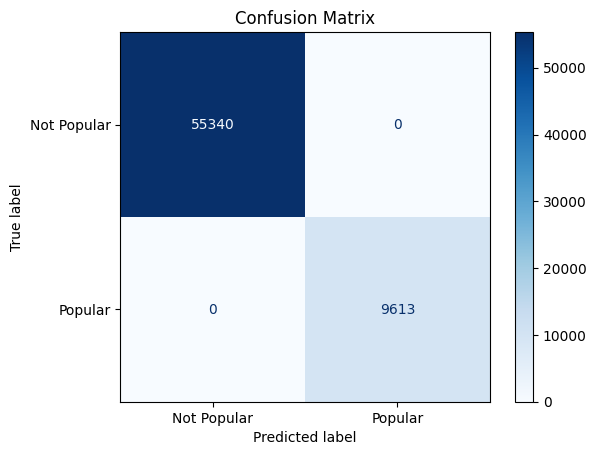

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Popular', 'Popular'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55340
           1       1.00      1.00      1.00      9613

    accuracy                           1.00     64953
   macro avg       1.00      1.00      1.00     64953
weighted avg       1.00      1.00      1.00     64953



In [9]:
# Analyze feature importance
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

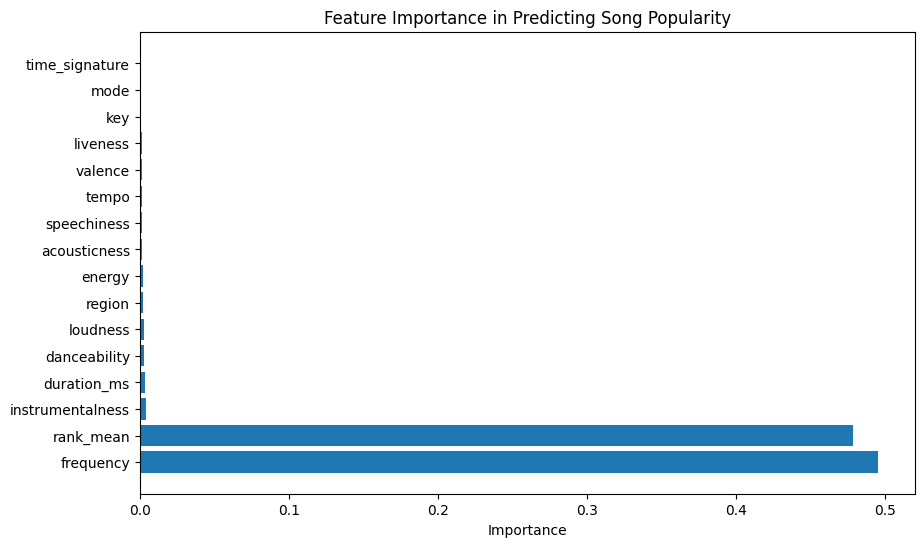

In [10]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Song Popularity')
plt.show()

In [20]:
# Example new song features
new_song_data = {
    'region': 5,
    'rank_mean': 0,  # Placeholder value,
    'frequency': 0,  # Placeholder value,
    'danceability': 0.7,
    'energy': 0.8,
    'key': 5,               
    'loudness': -5.0,
    'mode': 1,
    'speechiness': 0.05,
    'acousticness': 0.1,
    'instrumentalness': 0.0,
    'liveness': 0.2,
    'valence': 0.6,
    'tempo': 120,
    'duration_ms': 200000,
    'time_signature': 4
}


# Create a DataFrame
new_song_df = pd.DataFrame([new_song_data], columns=X.columns)

# Scale the new song dat

# Make prediction
predicted_popularity = rf_model.predict(new_song_df)

# Output the prediction
if predicted_popularity[0] == 1:
    print("The new song is predicted to be popular.")
else:
    print("The new song is predicted to be not popular.")

The new song is predicted to be not popular.
